In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
df=pd.read_csv(r'D:\Orange_sms_filtering\part-00000-4d87ce39-bb55-4007-ba29-6420396d5fbb-c000.csv')

# Data Exploration

In [4]:
df.head()

,hour,sending_party_hash,distinct_B,successful_sms,variance_sms_length
0,2025-09-07-19,052bc08262e24bc83951069efebe1b9a,191,1161.0,6.346966
1,2025-09-07-19,06c63f8073398782871365937bc976b1,249,294.0,0.000000
2,2025-09-07-19,2576c1f07ea6de1f1b5a7974d2ac2d75,190,245.0,157.326865
3,2025-09-07-19,984f3a4bb17c82aa1441d3bf0749000c,191,191.0,0.000000
4,2025-09-07-19,ceab699e698f484d3e164a2fddef5f94,97,193.0,443.284974


In [5]:
df.tail()

,hour,sending_party_hash,distinct_B,successful_sms,variance_sms_length
11920732,2025-09-10-05,cb6a472be3b60da43ac9514662c99e7d,1,2.0,1984.5
11920733,2025-09-10-05,8cc1cdad37f62e5a57ab631a96a8e620,1,2.0,2178.0
11920734,2025-09-10-05,b2cad9e7279f3b0984705336b567058c,1,2.0,2178.0
11920735,2025-09-10-05,607c56d98ab9db43d15ebfaf6b499fdd,1,2.0,2178.0
11920736,2025-09-10-05,a7183f49423f4c37a1c60f7bac61fd3b,1,2.0,3120.5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11920737 entries, 0 to 11920736
Data columns (total 5 columns):
 #   Column               Dtype  
---  ------               -----  
 0   hour                 object 
 1   sending_party_hash   object 
 2   distinct_B           int64  
 3   successful_sms       float64
 4   variance_sms_length  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 454.7+ MB


In [7]:
df.isna().sum()

hour                         0
sending_party_hash           9
distinct_B                   0
successful_sms               0
variance_sms_length    6522770
dtype: int64

In [8]:
df.describe().round(2)

,distinct_B,successful_sms,variance_sms_length
count,11920737.00,11920737.00,5397967.00
mean,1.24,3.09,293.12
std,3.44,9.38,422.46
min,1.00,1.00,0.00
25%,1.00,1.00,19.00
50%,1.00,1.00,116.92
75%,1.00,3.00,420.50
max,766.00,2061.00,12482.00


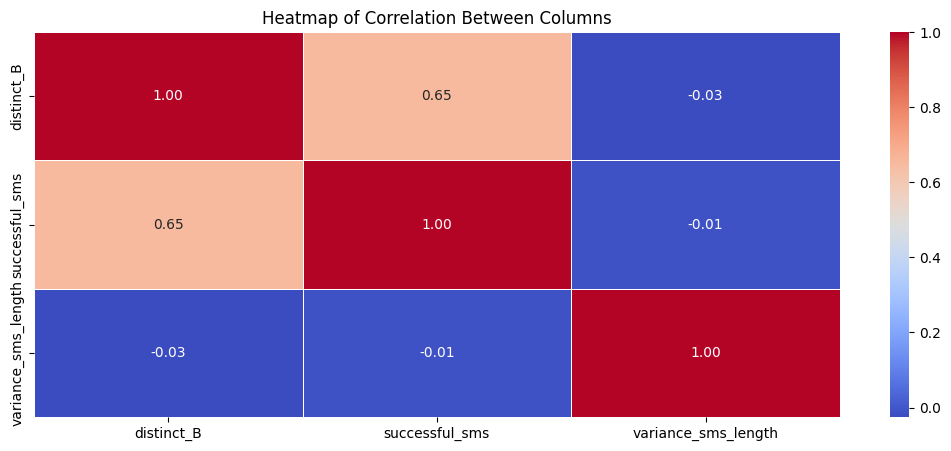

In [9]:
plt.figure(figsize=(13, 5))
numeric_columns = df.select_dtypes(include=np.number) 
correlation_matrix = numeric_columns.corr() 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap of Correlation Between Columns")
plt.show()

In [10]:
df['distinct_B'].value_counts()

distinct_B
1      11062998
2        685104
3         90241
4         21644
5          8022
         ...   
311           1
295           1
293           1
233           1
222           1
Name: count, Length: 315, dtype: int64

In [11]:
df['distinct_B'].unique()

array([191, 249, 190,  97, 100,  99,  90,  88,  80,  81,  75,  72,  64,
        62,  61,  60,  59,  58,  57,  31,  53,  29,  28,  50,  49,  27,
        48,   5,  39,  26,  25,  47,  46,  45,  44,   3,  41,   1,  15,
        33,  32,   2,  24,   7,  21,  17,  19,  18,  13,  16,  14,  12,
         4,  11,  10,   6,   8,   9, 369, 290, 263, 202, 175, 151, 150,
       127, 121, 118, 113,  96,  76,  77,  85,  73,  71,  69,  79,  78,
        74,  70,  36,  34,  54,  52,  40,  38,  37,  35,  22,  23,  20,
       136,  83, 129, 128, 126, 125, 124, 122, 120, 117, 115,  68, 114,
        66,  63, 103,  56,  67, 203, 154, 198, 197, 172,  82,  51,  30,
       141, 106,  91,  43,  42,  86,  93, 195, 107,  92, 266, 131,  55,
       188, 153,  89, 144,  84, 138,  95,  94, 399, 216, 200, 196, 184,
       181, 145, 143, 142, 137, 130, 140,  98, 162, 156, 152, 147, 139,
       112,  65, 215, 212, 164, 104, 199, 149, 135, 123,  87, 251, 252,
       214, 240, 173, 134, 132, 119, 111, 101, 166, 146, 110, 26

In [12]:
df['successful_sms'].value_counts()

successful_sms
1.0       6522770
2.0       2195001
3.0        995571
4.0        555554
5.0        345387
           ...   
907.0           1
971.0           1
1007.0          1
1077.0          1
516.0           1
Name: count, Length: 663, dtype: int64

# Data Preprocessing


In [13]:
df.isna().sum()

hour                         0
sending_party_hash           9
distinct_B                   0
successful_sms               0
variance_sms_length    6522770
dtype: int64

In [14]:
df[df['variance_sms_length'].isna()]

,hour,sending_party_hash,distinct_B,successful_sms,variance_sms_length
14802,2025-09-07-19,7cef9e1cc5dd442a692288e4cb6a4641,1,1.0,NaN
14803,2025-09-07-19,732ff9bc7a0f16cc4f532d5190423595,1,1.0,NaN
14804,2025-09-07-19,197502955699403e9d90e30b4bb5bee6,1,1.0,NaN
14805,2025-09-07-19,00009718f927d8cdaef05842391cbec1,1,1.0,NaN
14806,2025-09-07-19,fa3a4631c50e8879ec67b8167fa48eec,1,1.0,NaN
...,...,...,...,...,...
11919930,2025-09-10-05,0fd0cc712328ed93b15a4808d90dec36,1,1.0,NaN
11919931,2025-09-10-05,7d1d17e558c42c124b94d56304f1a0f4,1,1.0,NaN
11919932,2025-09-10-05,7f633c26d961cbe986f7b8550d41a096,1,1.0,NaN
11919933,2025-09-10-05,f025c2086a302e18a35972436d625de8,1,1.0,NaN


In [15]:
df.drop(columns=['variance_sms_length'],inplace=True)

In [16]:
df.dropna(subset=['sending_party_hash'],inplace=True)

In [17]:
df.isna().sum()

hour                  0
sending_party_hash    0
distinct_B            0
successful_sms        0
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(1516624)

In [21]:
df[df.duplicated()].sort_values('sending_party_hash')

,hour,sending_party_hash,distinct_B,successful_sms
10116636,2025-09-11-21,000021d8e174998d5e5113d1c2d325cb,1,1.0
11573069,2025-09-11-21,000021d8e174998d5e5113d1c2d325cb,1,1.0
9257727,2025-09-11-15,00009718f927d8cdaef05842391cbec1,2,2.0
4286405,2025-09-11-20,00009718f927d8cdaef05842391cbec1,2,4.0
9275690,2025-09-11-13,00009718f927d8cdaef05842391cbec1,1,1.0
...,...,...,...,...
9802331,2025-09-11-19,ffffc51c6f04103815249f59cabceabc,1,1.0
647931,2025-09-11-22,fffffe9b71f54b8d03a5ee4b37c42cf5,1,1.0
617452,2025-09-11-22,fffffe9b71f54b8d03a5ee4b37c42cf5,1,1.0
1139436,2025-09-11-18,fffffea0b42ad288ed53233b41a59e7e,1,1.0


In [22]:
df.drop_duplicates(inplace=True)

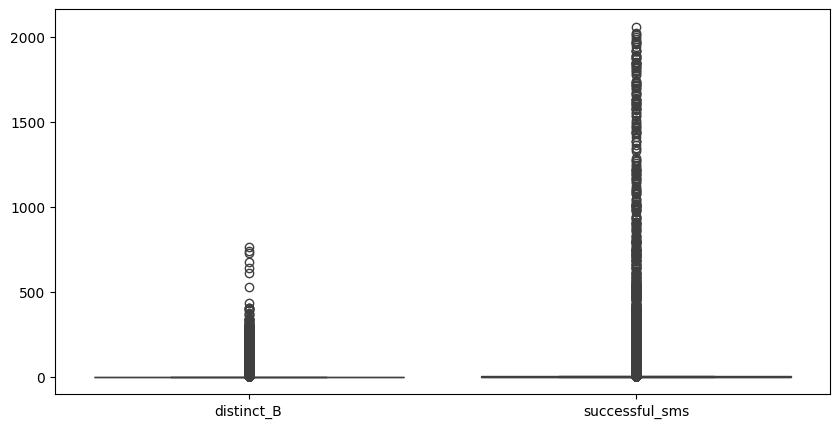

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['distinct_B', 'successful_sms']])
plt.show()

In [ ]:
df.describe().round(2)

,distinct_B,successful_sms
count,10404104.00,10404104.00
mean,1.24,3.10
std,3.43,9.29
min,1.00,1.00
25%,1.00,1.00
50%,1.00,1.00
75%,1.00,3.00
max,766.00,2061.00


In [ ]:
df['distinct_B'].quantile([0.90, 0.95, 0.99, 0.995, 0.999])


0.900     1.0
0.950     2.0
0.990     3.0
0.995     5.0
0.999    50.0
Name: distinct_B, dtype: float64

In [ ]:
df[df['distinct_B']>5].shape[0]

46809

In [ ]:
df['successful_sms'].quantile([0.90, 0.95,0.98,0.99, 0.995,0.999])


0.900     6.0
0.950    10.0
0.980    18.0
0.990    27.0
0.995    39.0
0.999    87.0
Name: successful_sms, dtype: float64

In [ ]:
df[df['successful_sms']>27].shape[0]

102937

In [ ]:
data_for_clustering=df.copy()

In [27]:
data_for_clustering = df[(df['distinct_B'] <= 5) & (df['successful_sms'] <= 27)]

In [28]:
data_for_clustering.shape

(10281995, 4)

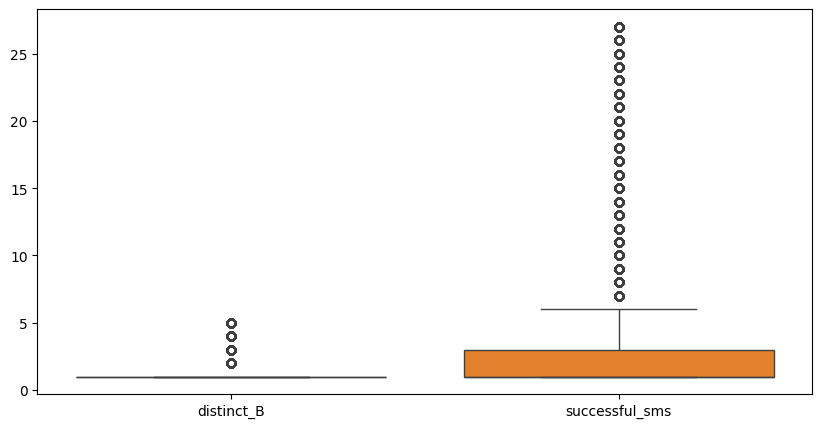

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data_for_clustering[['distinct_B', 'successful_sms']])
plt.show()

In [30]:
data_for_clustering.describe().round(2)

,distinct_B,successful_sms
count,10281995.00,10281995.00
mean,1.08,2.57
std,0.33,3.25
min,1.00,1.00
25%,1.00,1.00
50%,1.00,1.00
75%,1.00,3.00
max,5.00,27.00


In [31]:
data_for_clustering.isna().sum()

hour                  0
sending_party_hash    0
distinct_B            0
successful_sms        0
dtype: int64

In [32]:

data_for_clustering['msgs_per_recipient'] = data_for_clustering['successful_sms'] / data_for_clustering['distinct_B']


C:\Users\TM\AppData\Local\Temp\ipykernel_15928\2122811406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_clustering['msgs_per_recipient'] = data_for_clustering['successful_sms'] / data_for_clustering['distinct_B']


In [33]:
data_for_clustering.head()

,hour,sending_party_hash,distinct_B,successful_sms,msgs_per_recipient
201,2025-09-07-19,261f2769043cc64fec8660e432db38e8,5,26.0,5.2
235,2025-09-07-19,ac7161e920b093d6d15b12bb478278cc,3,24.0,8.0
236,2025-09-07-19,2e95bc5787b6b75bb0a55b90d5ac1755,4,26.0,6.5
243,2025-09-07-19,ea2fb5f52dd65b280ce842e7506fef70,2,27.0,13.5
246,2025-09-07-19,e56a68223ff44e419ac928397fe1d8c5,2,27.0,13.5


# EDA

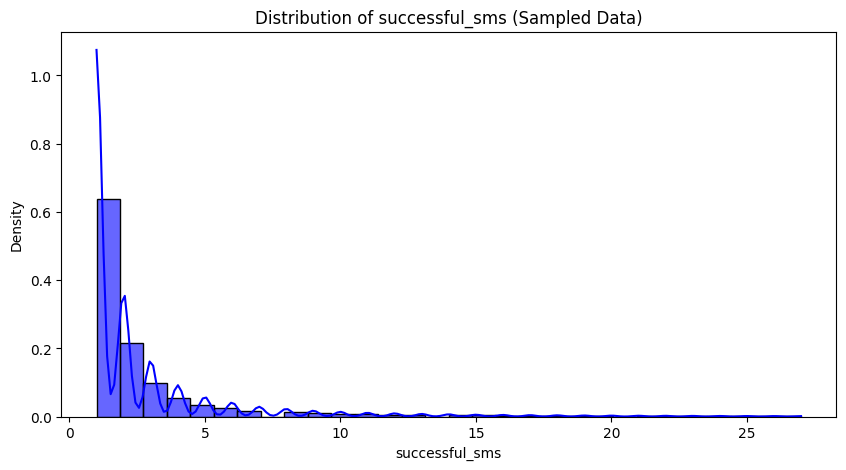

In [34]:
sample_data = data_for_clustering.sample(frac=0.1, random_state=42)  
plt.figure(figsize=(10, 5))
sns.histplot(sample_data['successful_sms'] , bins=30, kde=True, color='blue', stat='density', alpha=0.6, edgecolor='black')
plt.xlabel("successful_sms")
plt.ylabel("Density")
plt.title("Distribution of successful_sms (Sampled Data)")
plt.show()

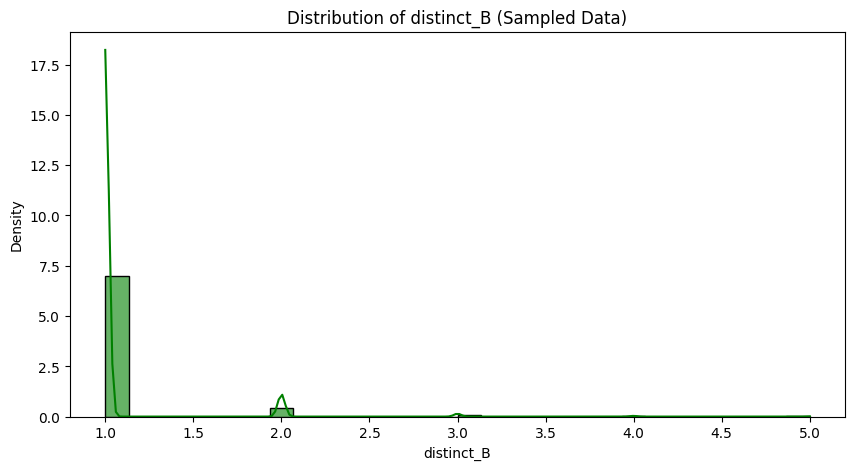

In [35]:
sample_data = data_for_clustering.sample(frac=0.1, random_state=42) 
plt.figure(figsize=(10, 5)) 
sns.histplot(sample_data['distinct_B'], bins=30, kde=True, color='green', stat='density', alpha=0.6, edgecolor='black')
plt.xlabel("distinct_B")
plt.ylabel("Density")
plt.title("Distribution of distinct_B (Sampled Data)")
plt.show()

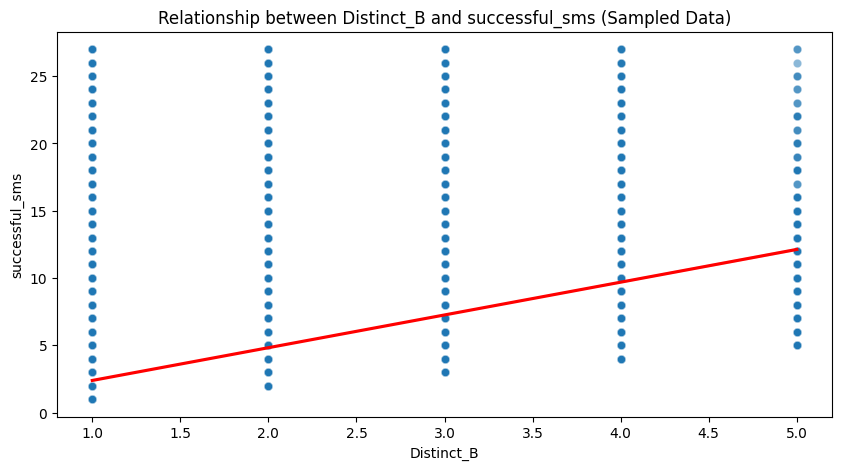

In [36]:
sample_data = data_for_clustering.sample(frac=0.1, random_state=42)  
plt.figure(figsize=(10, 5))
sns.scatterplot(x='distinct_B', y='successful_sms', data=sample_data, alpha=0.3)
sns.regplot(x='distinct_B', y='successful_sms', data=sample_data, scatter=False, color='red')  # regression line
plt.xlabel("Distinct_B")
plt.ylabel("successful_sms")
plt.title("Relationship between Distinct_B and successful_sms (Sampled Data)")
plt.show()

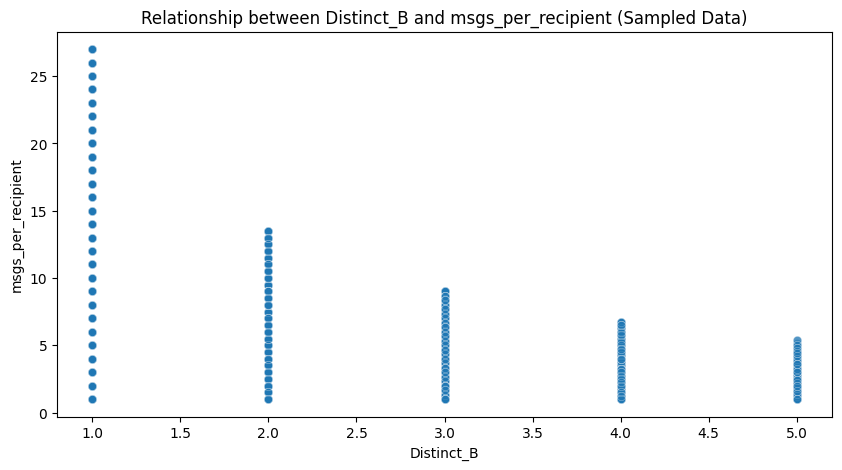

In [37]:
sample_data = data_for_clustering.sample(frac=0.1, random_state=42) 
plt.figure(figsize=(10, 5))
sns.scatterplot(x='distinct_B', y='msgs_per_recipient', data=sample_data, alpha=0.3)
plt.xlabel("Distinct_B")
plt.ylabel("msgs_per_recipient")
plt.title("Relationship between Distinct_B and msgs_per_recipient (Sampled Data)")
plt.show()

In [38]:
data_for_clustering['hour_only'] = pd.to_datetime(data_for_clustering['hour']).dt.hour

C:\Users\TM\AppData\Local\Temp\ipykernel_15928\2454103365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_clustering['hour_only'] = pd.to_datetime(data_for_clustering['hour']).dt.hour


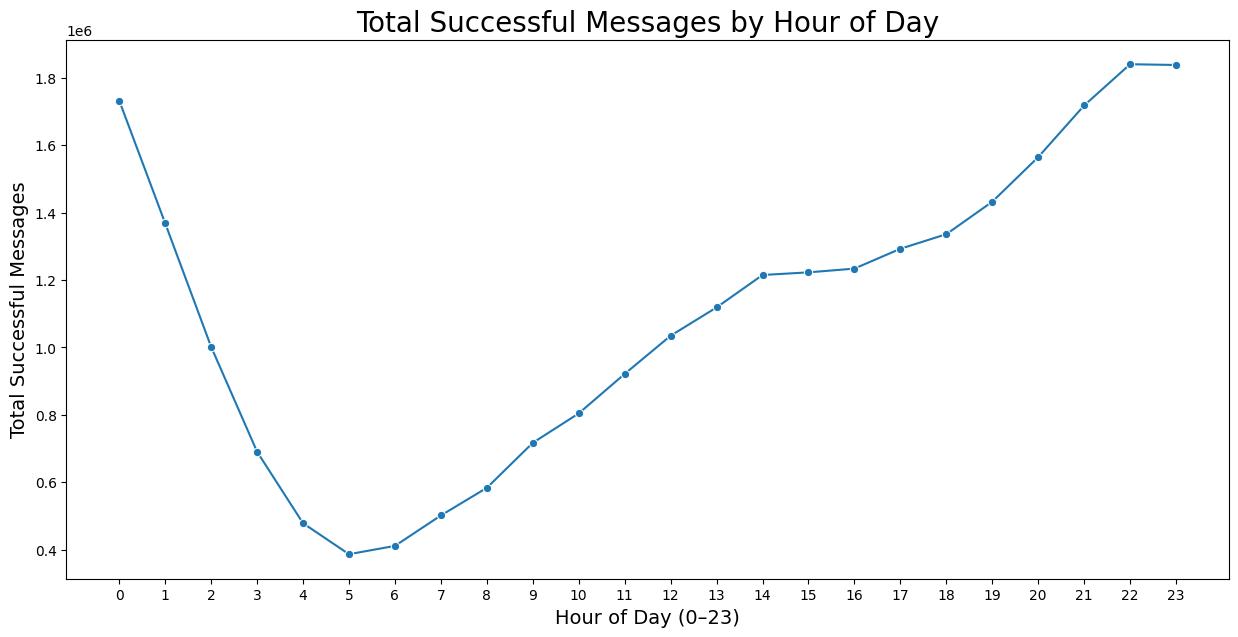

In [39]:

plt.figure(figsize=(15, 7))
df_hour = data_for_clustering.groupby("hour_only")["successful_sms"].sum()
sns.lineplot(x=df_hour.index,y=df_hour.values,markers=True, marker="o")
plt.title("Total Successful Messages by Hour of Day",fontdict={'fontsize': 20})
plt.ylabel("Total Successful Messages", fontsize=14)
plt.xlabel("Hour of Day (0–23)",fontdict={'fontsize': 14})
plt.xticks(range(0,24))
plt.show()

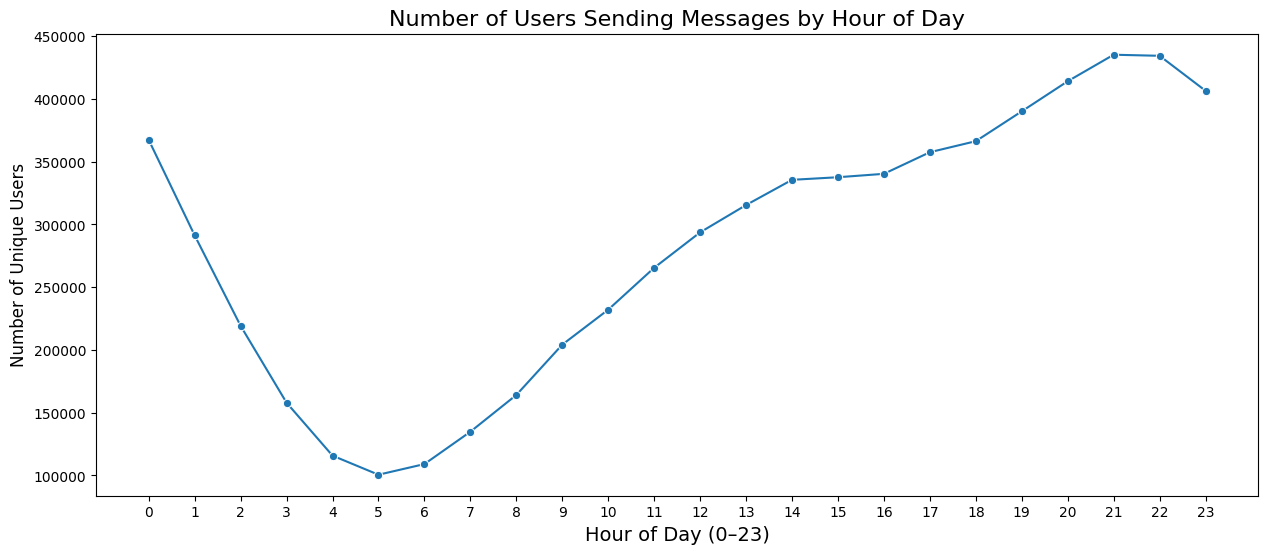

In [40]:
df_hour = data_for_clustering.groupby('hour_only')['sending_party_hash'].nunique()
plt.figure(figsize=(15,6))
sns.lineplot(x=df_hour.index, y=df_hour.values, marker="o",ax=plt.gca())
plt.xlabel("Hour of Day (0–23)", fontsize=14)
plt.ylabel("Number of Unique Users", fontsize=12)
plt.title("Number of Users Sending Messages by Hour of Day", fontsize=16)
plt.xticks(range(0,24)) 
plt.show()


# Feature Engineering For Clustering

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_features=scaler.fit_transform((data_for_clustering[['distinct_B', 'successful_sms','msgs_per_recipient']]))
scaled_features

array([[11.98821855,  7.19979633,  0.94877137],
       [ 5.87164175,  6.58516293,  1.88931069],
       [ 8.92993015,  7.19979633,  1.38545034],
       ...,
       [-0.24493505, -0.17580443, -0.12613071],
       [-0.24493505, -0.17580443, -0.12613071],
       [-0.24493505, -0.17580443, -0.12613071]])

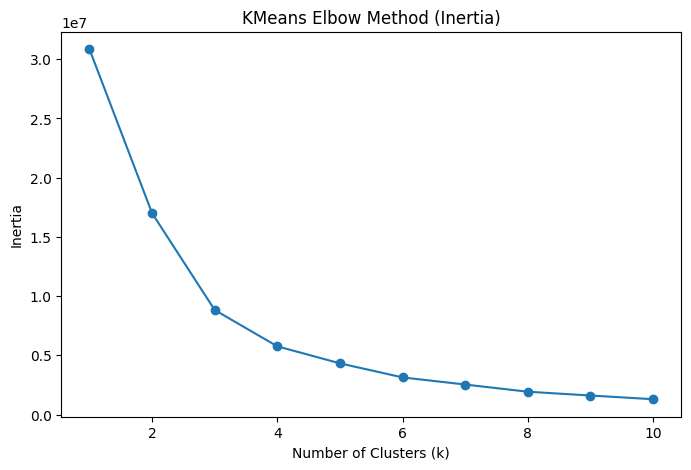

In [42]:
from enum import auto
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertias, Ks = [], range(1, 11)

for k in Ks:
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    km.fit(scaled_features)
    inertias.append(km.inertia_)
plt.figure(figsize=(8,5))
plt.plot(list(Ks), inertias, marker="o")
plt.title("KMeans Elbow Method (Inertia)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()


# Clustering

In [43]:
kmeans=KMeans(n_clusters=2,n_init='auto', random_state=42)
km_labels=kmeans.fit_predict(scaled_features)

In [44]:
data_for_clustering['KMeans_Labels']=km_labels
data_for_clustering['KMeans_Labels'].value_counts()

C:\Users\TM\AppData\Local\Temp\ipykernel_15928\3162733518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_clustering['KMeans_Labels']=km_labels


KMeans_Labels
0    9645104
1     636891
Name: count, dtype: int64

Text(0.5, 1.0, 'KMeans Clustering Results')

C:\Users\TM\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\TM\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


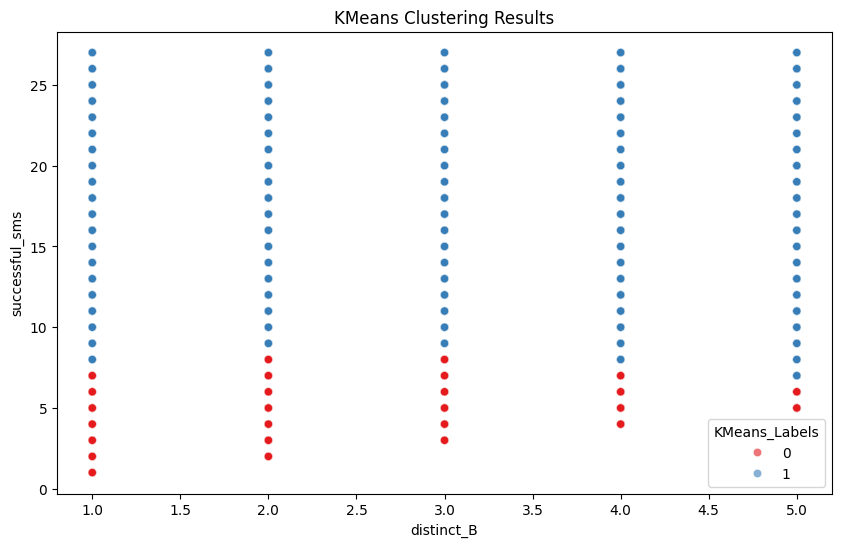

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distinct_B', y='successful_sms', hue='KMeans_Labels', data=data_for_clustering, palette='Set1', alpha=0.6)
plt.title("KMeans Clustering Results")

In [46]:
data_for_clustering[data_for_clustering['KMeans_Labels']==1]

,hour,sending_party_hash,distinct_B,successful_sms,msgs_per_recipient,hour_only,KMeans_Labels
201,2025-09-07-19,261f2769043cc64fec8660e432db38e8,5,26.0,5.2,19,1
235,2025-09-07-19,ac7161e920b093d6d15b12bb478278cc,3,24.0,8.0,19,1
236,2025-09-07-19,2e95bc5787b6b75bb0a55b90d5ac1755,4,26.0,6.5,19,1
243,2025-09-07-19,ea2fb5f52dd65b280ce842e7506fef70,2,27.0,13.5,19,1
246,2025-09-07-19,e56a68223ff44e419ac928397fe1d8c5,2,27.0,13.5,19,1
...,...,...,...,...,...,...,...
11915210,2025-09-10-05,20596b20ff066aa513656657308bf420,1,9.0,9.0,5,1
11915211,2025-09-10-05,957e895f50d1b600f86bb1747a072d24,1,10.0,10.0,5,1
11920027,2025-09-10-05,383f95ed1c77a3ddc2f319372aca96af,1,9.0,9.0,5,1
11920051,2025-09-10-05,d97a3fba7e76ab7456daf3008bd609de,1,8.0,8.0,5,1


# Anamoly Detection

In [89]:
df.head()

,hour,sending_party_hash,distinct_B,successful_sms
0,2025-09-07-19,052bc08262e24bc83951069efebe1b9a,191,1161.0
1,2025-09-07-19,06c63f8073398782871365937bc976b1,249,294.0
2,2025-09-07-19,2576c1f07ea6de1f1b5a7974d2ac2d75,190,245.0
3,2025-09-07-19,984f3a4bb17c82aa1441d3bf0749000c,191,191.0
4,2025-09-07-19,ceab699e698f484d3e164a2fddef5f94,97,193.0


In [90]:
df.shape

(10404104, 4)

In [91]:
data_for_anamoly=df.copy()

In [92]:
data_for_anamoly['day']=pd.to_datetime(data_for_anamoly['hour']).dt.day_name()
data_for_anamoly['hour_only']=pd.to_datetime(data_for_anamoly['hour']).dt.hour
data_for_anamoly['msgs_per_hour'] = data_for_anamoly.groupby(
    ['sending_party_hash','hour_only']
)['successful_sms'].transform('sum')


In [93]:
data_for_anamoly['msgs_per_recipient'] = data_for_anamoly['successful_sms'] / data_for_anamoly['distinct_B']

In [94]:
data_for_anamoly.head()

,hour,sending_party_hash,distinct_B,successful_sms,day,hour_only,msgs_per_hour,msgs_per_recipient
0,2025-09-07-19,052bc08262e24bc83951069efebe1b9a,191,1161.0,Sunday,19,1162.0,6.078534
1,2025-09-07-19,06c63f8073398782871365937bc976b1,249,294.0,Sunday,19,301.0,1.180723
2,2025-09-07-19,2576c1f07ea6de1f1b5a7974d2ac2d75,190,245.0,Sunday,19,252.0,1.289474
3,2025-09-07-19,984f3a4bb17c82aa1441d3bf0749000c,191,191.0,Sunday,19,191.0,1.000000
4,2025-09-07-19,ceab699e698f484d3e164a2fddef5f94,97,193.0,Sunday,19,193.0,1.989691


In [95]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_features=scaler.fit_transform((data_for_anamoly[['distinct_B', 'successful_sms']]))

In [96]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.001, random_state=42)
lables=iso.fit_predict(scaled_features)

In [97]:
data_for_anamoly['IsolationForest_Labels']=lables
scores = iso.decision_function(scaled_features)
data_for_anamoly['score'] = scores
data_for_anamoly['IsolationForest_Labels'].value_counts()

IsolationForest_Labels
 1    10394019
-1       10085
Name: count, dtype: int64

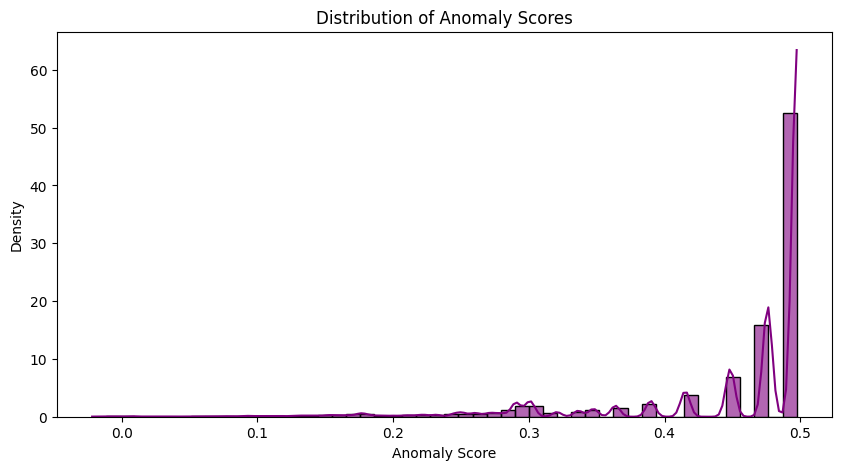

In [98]:
plt.figure(figsize=(10,5))
sns.histplot(data_for_anamoly['score'], bins=50, kde=True, color='purple', stat='density', alpha=0.6, edgecolor='black')
plt.xlabel("Anomaly Score")
plt.ylabel("Density")
plt.title("Distribution of Anomaly Scores")
plt.show()

In [77]:
iso.predict([[4,50]])

array([-1])

In [78]:
data_for_anamoly[data_for_anamoly['IsolationForest_Labels']==-1].head(100)

,hour,sending_party_hash,distinct_B,successful_sms,day,hour_only,msgs_per_hour,msgs_per_recipient,IsolationForest_Labels,score
0,2025-09-07-19,052bc08262e24bc83951069efebe1b9a,191,1161.0,Sunday,19,1162.0,6.078534,-1,-0.021873
1,2025-09-07-19,06c63f8073398782871365937bc976b1,249,294.0,Sunday,19,301.0,1.180723,-1,-0.021873
2,2025-09-07-19,2576c1f07ea6de1f1b5a7974d2ac2d75,190,245.0,Sunday,19,252.0,1.289474,-1,-0.021873
3,2025-09-07-19,984f3a4bb17c82aa1441d3bf0749000c,191,191.0,Sunday,19,191.0,1.000000,-1,-0.021275
4,2025-09-07-19,ceab699e698f484d3e164a2fddef5f94,97,193.0,Sunday,19,193.0,1.989691,-1,-0.018289
...,...,...,...,...,...,...,...,...,...,...
83373,2025-09-03-00,1b8dfdbc4c8c87f73b70b302b1f2558c,66,240.0,Wednesday,0,1295.0,3.636364,-1,-0.018885
83374,2025-09-03-00,12732f0f5152dde2fd019317634a2bc1,66,240.0,Wednesday,0,1273.0,3.636364,-1,-0.018885
83375,2025-09-03-00,2692941bbe61ceec0a87d329dab2c5ca,66,232.0,Wednesday,0,1407.0,3.515152,-1,-0.018885
83376,2025-09-03-00,d3330344b28ff23154abe5d12992dc95,63,219.0,Wednesday,0,1356.0,3.476190,-1,-0.018885


C:\Users\TM\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


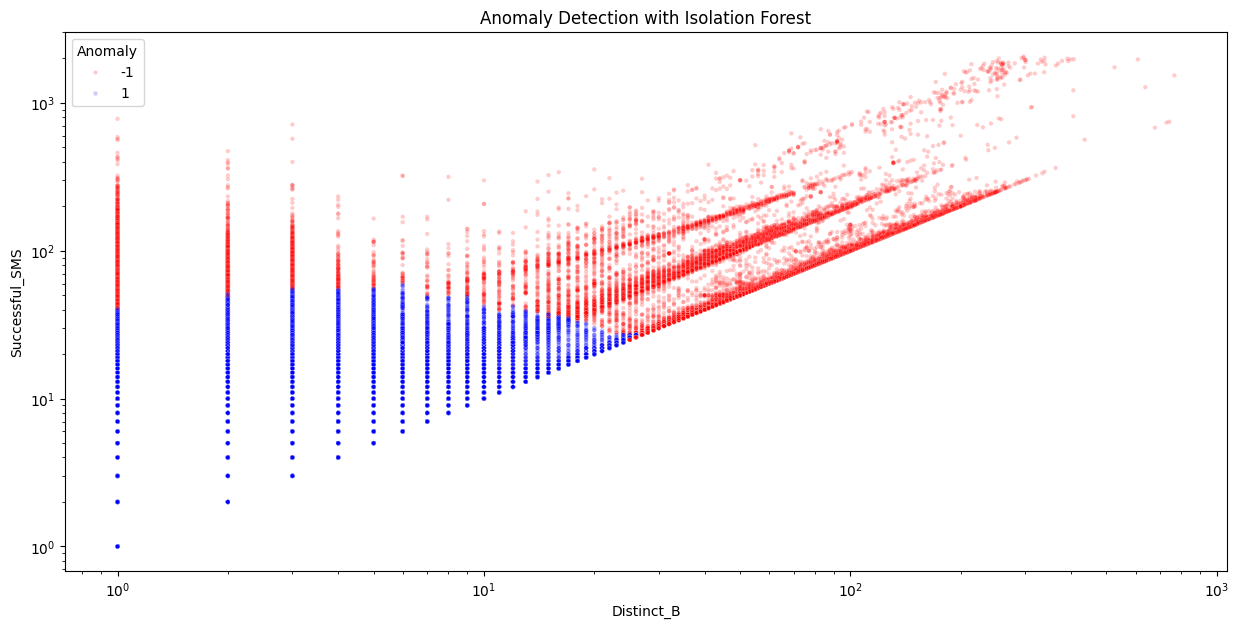

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))
sns.scatterplot(
    x=data_for_anamoly['distinct_B'],
    y=data_for_anamoly['successful_sms'],
    hue=data_for_anamoly['IsolationForest_Labels'],
    palette={1: 'blue', -1: 'red'},
    alpha=0.2, s=10
)
plt.title("Anomaly Detection with Isolation Forest")
plt.xlabel("Distinct_B")
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Successful_SMS")
plt.legend(title="Anomaly")
plt.show()

# labeld Dataset

# EDA

In [99]:
data_for_anamoly['IsolationForest_Labels']=data_for_anamoly['IsolationForest_Labels'].map({1:'Normal', -1:'Anomaly'})

In [100]:
data_for_anamoly.head(10)

,hour,sending_party_hash,distinct_B,successful_sms,day,hour_only,msgs_per_hour,msgs_per_recipient,IsolationForest_Labels,score
0,2025-09-07-19,052bc08262e24bc83951069efebe1b9a,191,1161.0,Sunday,19,1162.0,6.078534,Anomaly,-0.021873
1,2025-09-07-19,06c63f8073398782871365937bc976b1,249,294.0,Sunday,19,301.0,1.180723,Anomaly,-0.021873
2,2025-09-07-19,2576c1f07ea6de1f1b5a7974d2ac2d75,190,245.0,Sunday,19,252.0,1.289474,Anomaly,-0.021873
3,2025-09-07-19,984f3a4bb17c82aa1441d3bf0749000c,191,191.0,Sunday,19,191.0,1.000000,Anomaly,-0.021275
4,2025-09-07-19,ceab699e698f484d3e164a2fddef5f94,97,193.0,Sunday,19,193.0,1.989691,Anomaly,-0.018289
5,2025-09-07-19,7434dc6fbc1e6917f057463b22f192aa,100,100.0,Sunday,19,100.0,1.000000,Anomaly,-0.008802
6,2025-09-07-19,327c1572a6a69c22b14fe554c0231a31,100,100.0,Sunday,19,127.0,1.000000,Anomaly,-0.008802
7,2025-09-07-19,7decf32308ff36a1bfa80b93a8d4fdbb,99,99.0,Sunday,19,99.0,1.000000,Anomaly,-0.007034
8,2025-09-07-19,e86ae5cd28f11c716887876c62e2825d,90,90.0,Sunday,19,90.0,1.000000,Anomaly,-0.007034
9,2025-09-07-19,1bd59e69db3717ee5bd16c0cc5eb7ab0,88,89.0,Sunday,19,93.0,1.011364,Anomaly,-0.007034


In [101]:
data_for_anamoly.head()

,hour,sending_party_hash,distinct_B,successful_sms,day,hour_only,msgs_per_hour,msgs_per_recipient,IsolationForest_Labels,score
0,2025-09-07-19,052bc08262e24bc83951069efebe1b9a,191,1161.0,Sunday,19,1162.0,6.078534,Anomaly,-0.021873
1,2025-09-07-19,06c63f8073398782871365937bc976b1,249,294.0,Sunday,19,301.0,1.180723,Anomaly,-0.021873
2,2025-09-07-19,2576c1f07ea6de1f1b5a7974d2ac2d75,190,245.0,Sunday,19,252.0,1.289474,Anomaly,-0.021873
3,2025-09-07-19,984f3a4bb17c82aa1441d3bf0749000c,191,191.0,Sunday,19,191.0,1.000000,Anomaly,-0.021275
4,2025-09-07-19,ceab699e698f484d3e164a2fddef5f94,97,193.0,Sunday,19,193.0,1.989691,Anomaly,-0.018289


In [102]:
pv_week_per_hour=data_for_anamoly.pivot_table(index='day',
                                columns='hour_only',
                                values='successful_sms',
                                aggfunc='sum',)
pv_week_per_hour

hour_only,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
Friday,289152.0,253073.0,193102.0,139451.0,99288.0,75249.0,65847.0,66154.0,78134.0,89990.0,...,210511.0,222709.0,208841.0,215724.0,225390.0,229999.0,247381.0,274753.0,301678.0,309725.0
Monday,419611.0,336239.0,250673.0,172559.0,119063.0,96622.0,102210.0,123304.0,149098.0,186232.0,...,217220.0,217888.0,220090.0,223568.0,226364.0,233049.0,253997.0,283116.0,300591.0,316256.0
Saturday,289326.0,238504.0,176325.0,128103.0,86743.0,66152.0,66243.0,77073.0,87806.0,110452.0,...,216121.0,217530.0,214752.0,219903.0,223780.0,244372.0,257846.0,280923.0,306521.0,311088.0
Sunday,278056.0,225734.0,169322.0,116917.0,85078.0,66778.0,68930.0,82505.0,98916.0,124752.0,...,226155.0,215806.0,218079.0,231214.0,229138.0,238620.0,252016.0,272067.0,306878.0,315710.0
Thursday,277446.0,225199.0,170482.0,117657.0,83279.0,62875.0,67513.0,80898.0,94131.0,120315.0,...,216732.0,214129.0,213174.0,224345.0,229168.0,239876.0,267246.0,293048.0,311327.0,315087.0
Tuesday,276405.0,226465.0,168271.0,120790.0,82431.0,65488.0,68511.0,83362.0,93720.0,118758.0,...,237189.0,231804.0,224255.0,227245.0,236129.0,243029.0,258331.0,284142.0,308212.0,315519.0
Wednesday,279669.0,225715.0,167045.0,113794.0,77687.0,64692.0,70922.0,83365.0,95791.0,119747.0,...,223509.0,224915.0,228729.0,223527.0,223630.0,248553.0,271260.0,286976.0,309098.0,310429.0


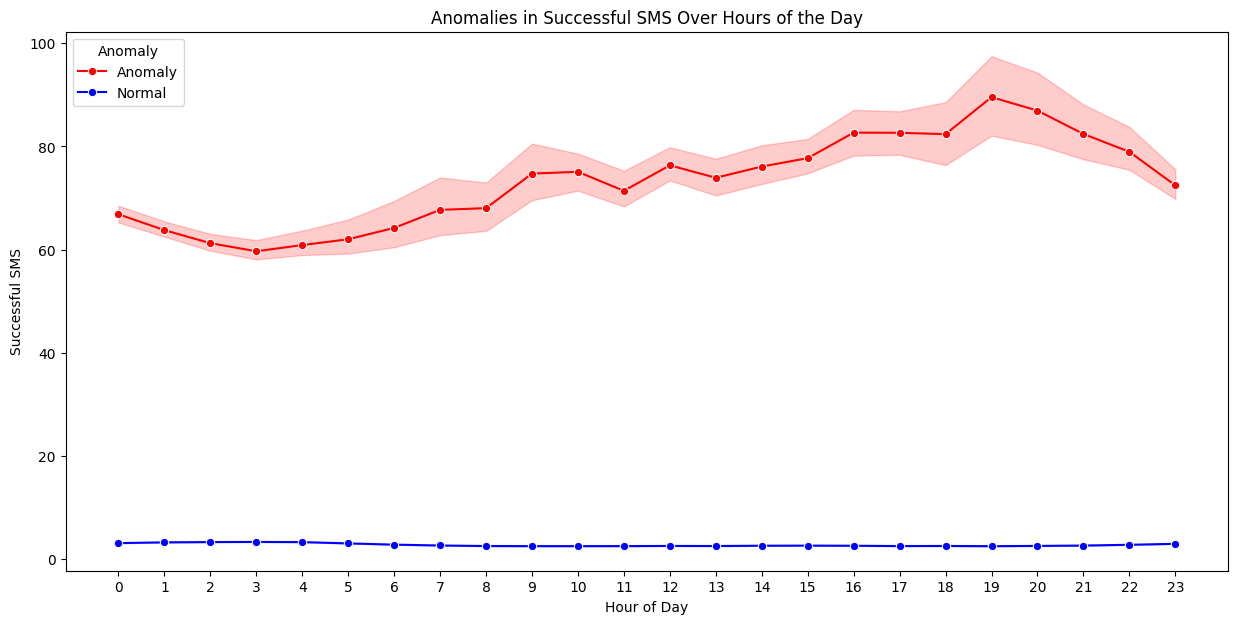

In [65]:
plt.figure(figsize=(15, 7))
sns.lineplot(
    data=data_for_anamoly,
    x='hour_only',
    y='successful_sms',
    hue='IsolationForest_Labels',
    marker='o',
    palette={'Normal': 'blue', 'Anomaly': 'red'},  # Updated palette
    ax=plt.gca()
)
plt.title("Anomalies in Successful SMS Over Hours of the Day")
plt.legend(title="Anomaly", loc='upper left', fontsize=10)  # Removed 'kwargs'
plt.xlabel("Hour of Day")
plt.xticks(range(0, 24))
plt.ylabel("Successful SMS")
plt.show()

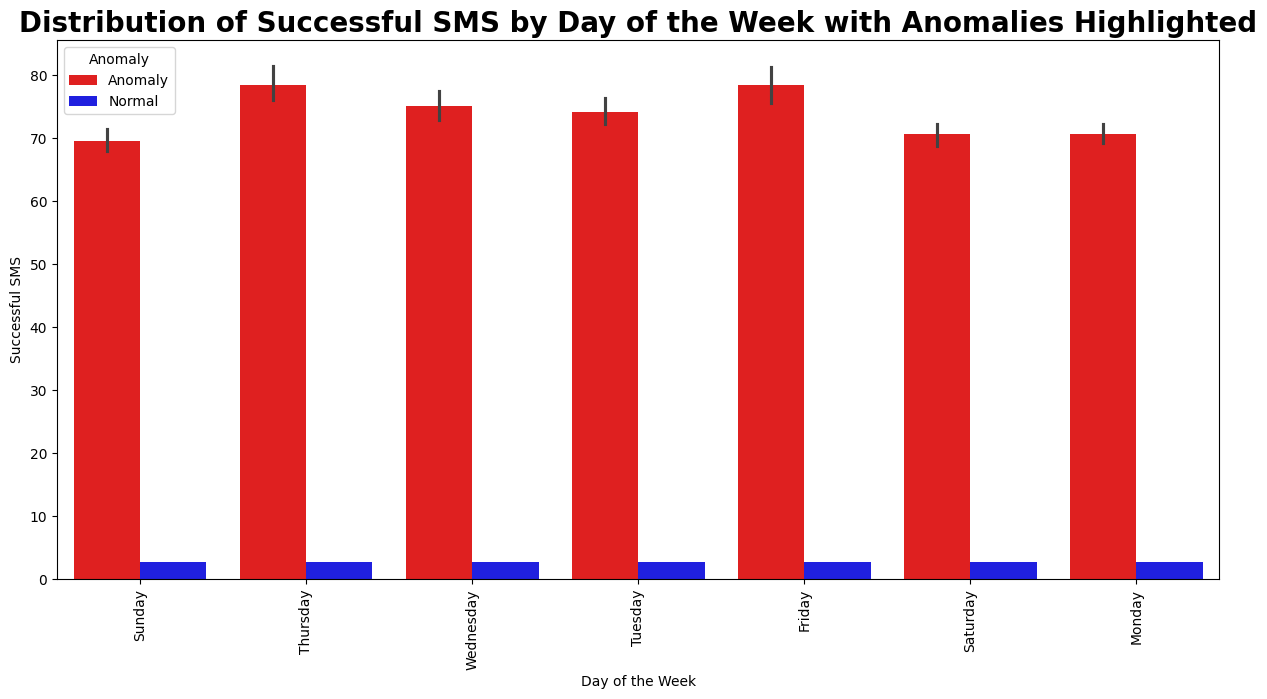

In [66]:
plt.figure(figsize=(15, 7))
sns.barplot(
    data=data_for_anamoly,
    x='day',
    y='successful_sms',
    hue='IsolationForest_Labels',
    palette={'Normal': 'blue', 'Anomaly': 'red'},  
    ax=plt.gca()
)
plt.title("Distribution of Successful SMS by Day of the Week with Anomalies Highlighted", fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.legend(title="Anomaly", loc='upper left', fontsize=10)  # Removed 'kwargs'
plt.xticks(rotation=90, fontsize=10, fontweight='light')
plt.xlabel("Day of the Week")
plt.ylabel("Successful SMS")
plt.show()

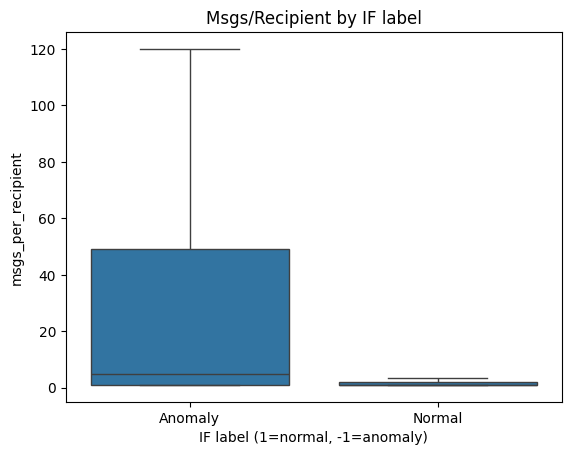

In [67]:
sns.boxplot(x='IsolationForest_Labels', y='msgs_per_recipient', data=data_for_anamoly, showfliers=False)
plt.title("Msgs/Recipient by IF label"); plt.xlabel("IF label (1=normal, -1=anomaly)"); plt.show()


# Feature Engineering

In [103]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled_features_supervised=scaler.fit_transform((data_for_anamoly[['distinct_B', 'successful_sms']]))


In [104]:
y=data_for_anamoly['IsolationForest_Labels'].map({'Normal':0, 'Anomaly':1})

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_temp,y_train,y_temp=train_test_split(X_scaled_features_supervised,y,test_size=0.3,random_state=42,stratify=y)
X_val,X_test,y_val,y_test=train_test_split(X_temp,y_temp,test_size=0.5,random_state=42,stratify=y_temp)

In [106]:
from lightgbm import LGBMClassifier
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, average_precision_score,
    classification_report, confusion_matrix, precision_recall_curve
)
pos = (y_train == 1).sum()
neg = (y_train == 0).sum()
scale_pos_weight = neg / max(pos, 1)

lgb = LGBMClassifier(
    n_estimators=5000,          
    learning_rate=0.05,
    max_depth=-1,               
    num_leaves=64,              
    subsample=0.8, colsample_bytree=0.8,
    reg_lambda=1.0,
    objective="binary",
    n_jobs=1,
    class_weight="balanced",
    scale_pos_weight=scale_pos_weight,
    random_state=42
)


In [107]:
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
lgb.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric="auc",
    callbacks=[early_stopping(200), log_evaluation(50)]  
)


[LightGBM] [Info] Number of positive: 7059, number of negative: 7275813
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.065050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 231
[LightGBM] [Info] Number of data points in the train set: 7282872, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

LGBMClassifier(class_weight='balanced', colsample_bytree=0.8,
               learning_rate=0.05, n_estimators=5000, n_jobs=1, num_leaves=64,
               objective='binary', random_state=42, reg_lambda=1.0,
               scale_pos_weight=np.float64(1030.7144071398216), subsample=0.8)

In [108]:
proba_val = lgb.predict_proba(X_val)[:, 1]
prec, rec, thr = precision_recall_curve(y_val, proba_val)
target_recall = 0.90
idx = np.where(rec >= target_recall)[0]
th_best = thr[idx[-1]] if len(idx) else 0.5  # fallback

c:\Users\TM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [109]:
proba_test = lgb.predict_proba(X_test)[:, 1]
pred_test  = (proba_test >= th_best).astype(int)

c:\Users\TM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [110]:

print(f"Threshold (from Val, recall≥{target_recall:.0%}): {th_best:.4f}")
print("TEST PR-AUC :", average_precision_score(y_test, proba_test))
print("TEST ROC-AUC:", roc_auc_score(y_test, proba_test))
print("TEST Acc   :", accuracy_score(y_test, pred_test))
print("TEST Prec  :", precision_score(y_test, pred_test, zero_division=0))
print("TEST Recall:", recall_score(y_test, pred_test, zero_division=0))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred_test))
print("\nClassification report:\n", classification_report(y_test, pred_test, digits=4))


Threshold (from Val, recall≥90%): 1.0000
TEST PR-AUC : 0.9999660895378699
TEST ROC-AUC: 0.9999999679938663
TEST Acc   : 0.9999141364691891
TEST Prec  : 1.0
TEST Recall: 0.9114342366159948

Confusion Matrix:
 [[1559103       0]
 [    134    1379]]

Classification report:
               precision    recall  f1-score   support

           0     0.9999    1.0000    1.0000   1559103
           1     1.0000    0.9114    0.9537      1513

    accuracy                         0.9999   1560616
   macro avg     1.0000    0.9557    0.9768   1560616
weighted avg     0.9999    0.9999    0.9999   1560616



In [111]:
proba_train = lgb.predict_proba(X_train)[:,1]
proba_test  = lgb.predict_proba(X_test)[:,1]
print("Train AUC:", roc_auc_score(y_train, proba_train))
print("Test  AUC:", roc_auc_score(y_test,  proba_test))


c:\Users\TM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\TM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Train AUC: 1.0
Test  AUC: 0.9999999679938663


In [112]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1,bootstrap=True)
rf.fit(X_train,y_train)
y_val_pred=rf.predict(X_val)
y_test_pred=rf.predict(X_test)

In [113]:
print("\nClassification Report on Validation Set:\n")
print('validation report')
print(classification_report(y_val, y_val_pred))
print('test report')
print(classification_report(y_test, y_test_pred))



Classification Report on Validation Set:

validation report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1559103
           1       1.00      1.00      1.00      1513

    accuracy                           1.00   1560616
   macro avg       1.00      1.00      1.00   1560616
weighted avg       1.00      1.00      1.00   1560616

test report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1559103
           1       1.00      1.00      1.00      1513

    accuracy                           1.00   1560616
   macro avg       1.00      1.00      1.00   1560616
weighted avg       1.00      1.00      1.00   1560616



c:\Users\TM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


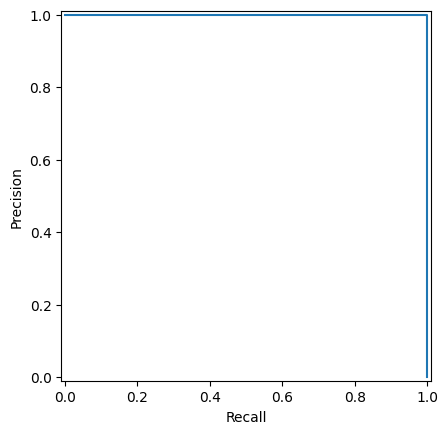

In [114]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

proba_test = lgb.predict_proba(X_test)[:,1]
prec, rec, _ = precision_recall_curve(y_test, proba_test)
disp = PrecisionRecallDisplay(precision=prec, recall=rec)
disp.plot()
plt.show()


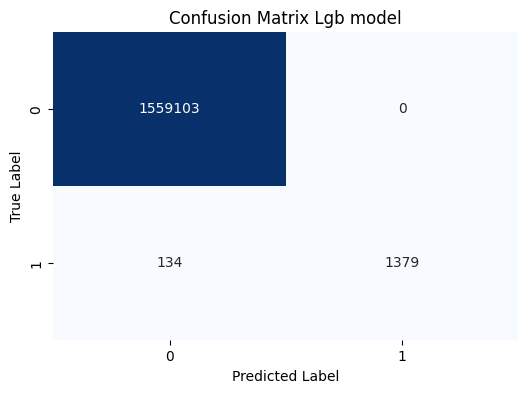

In [115]:
conf_matrix=confusion_matrix(y_test, pred_test)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix Lgb model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

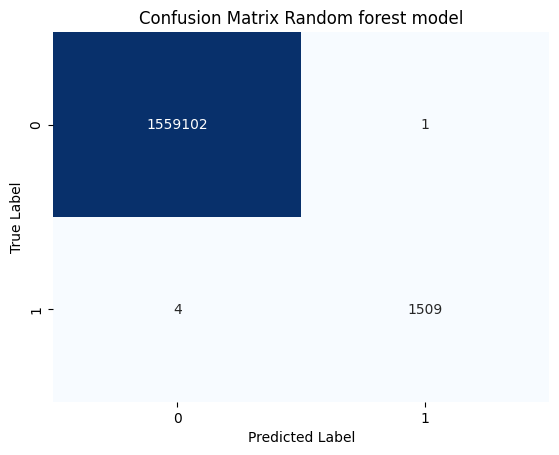

In [116]:
plt.Figure(figsize=(6,4))
conf_matrix=confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix Random forest model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

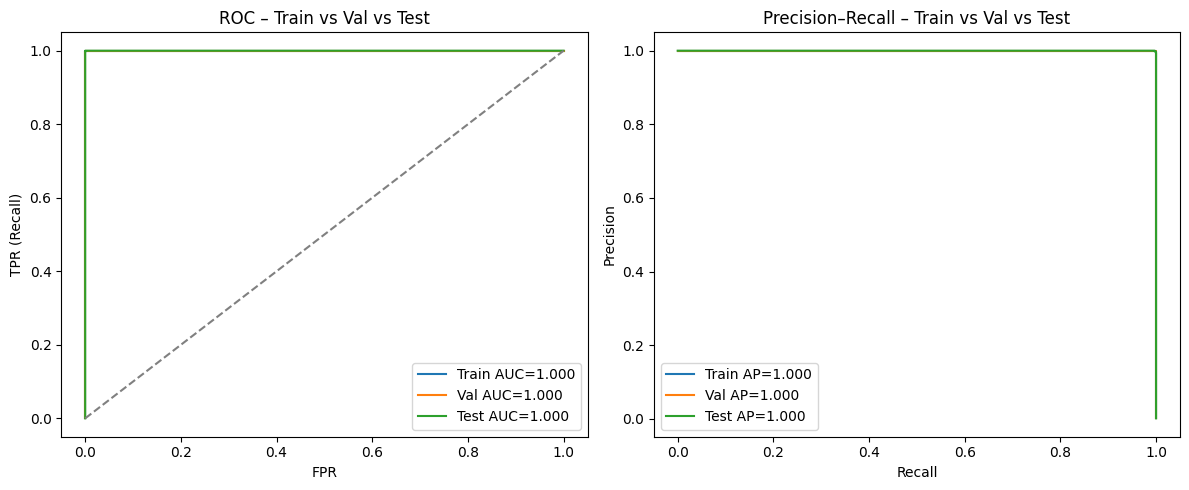

In [117]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, roc_auc_score

def proba(m, X):
    return m.predict_proba(X)[:,1]

splits = {
    "Train": (X_train, y_train),
    "Val":   (X_val,   y_val),
    "Test":  (X_test,  y_test),
}

plt.figure(figsize=(12,5))

# --- ROC ---
plt.subplot(1,2,1)
for name,(X,y) in splits.items():
    p = proba(rf, X)
    fpr, tpr, _ = roc_curve(y, p)
    plt.plot(fpr, tpr, label=f"{name} AUC={auc(fpr,tpr):.3f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.title("ROC – Train vs Val vs Test")
plt.xlabel("FPR"); plt.ylabel("TPR (Recall)")
plt.legend()

# --- Precision–Recall ---
plt.subplot(1,2,2)
for name,(X,y) in splits.items():
    p = proba(rf, X)
    prec, rec, _ = precision_recall_curve(y, p)
    ap = average_precision_score(y, p)
    plt.plot(rec, prec, label=f"{name} AP={ap:.3f}")
plt.title("Precision–Recall – Train vs Val vs Test")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.legend()

plt.tight_layout(); plt.show()


In [118]:
from joblib import dump, load
print(dump(lgb, 'lgb_model.joblib'))  
print(dump(rf, 'rf_model.joblib'))

['lgb_model.joblib']
['rf_model.joblib']


In [119]:
sample_data_for_saving = data_for_anamoly[[
    'sending_party_hash',
    'distinct_B',
    'successful_sms',
    'msgs_per_recipient'
]].sample(999999
          , random_state=42)

sample_data_for_saving.to_csv('sample_data_for_saving.csv', index=False)


In [120]:
sample_anamoly_data=data_for_anamoly[data_for_anamoly['IsolationForest_Labels']=='Anomaly'].copy()
sample_anamoly_data.to_csv('sample_anamoly_data.csv', index=False)

In [123]:
sample_data_from_df=df.sample(3500000, random_state=42)
sample_data_from_df.to_csv('sample_data_from_df.csv', index=False)

,hour,sending_party_hash,distinct_B,successful_sms
0,2025-09-07-19,052bc08262e24bc83951069efebe1b9a,191,1161.0
1,2025-09-07-19,06c63f8073398782871365937bc976b1,249,294.0
2,2025-09-07-19,2576c1f07ea6de1f1b5a7974d2ac2d75,190,245.0
3,2025-09-07-19,984f3a4bb17c82aa1441d3bf0749000c,191,191.0
4,2025-09-07-19,ceab699e698f484d3e164a2fddef5f94,97,193.0
